https://mlcourse.ai/book/topic02/topic02_visual_data_analysis.html

1. Dataset
Before we get to the data, let’s initialize our environment:

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In the first article, we looked at the data on customer churn for a telecom operator. We will reload the same dataset into a DataFrame:

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [3]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

To get acquainted with our data, let’s look at the first 5 entries using head():

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

2. Univariate visualization
Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

2.1 Quantitative features
Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

Histograms and density plots
The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame’s method hist().

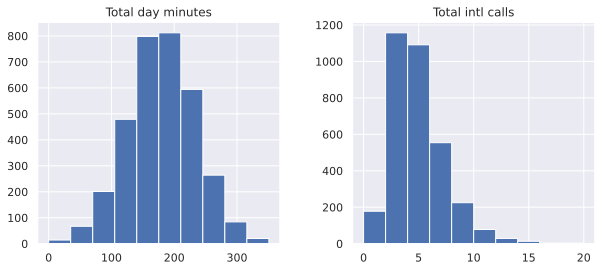

In [6]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable Total day minutes is normally distributed, while Total intl calls is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let’s create density plots for the same two variables:

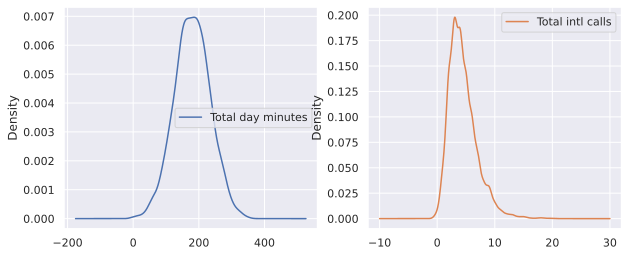

In [7]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

It is also possible to plot a distribution of observations with seaborn’s distplot(). For example, let’s look at the distribution of Total day minutes. By default, the plot displays the histogram with the kernel density estimate (KDE) on top.

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total intl calls', ylabel='Count'>

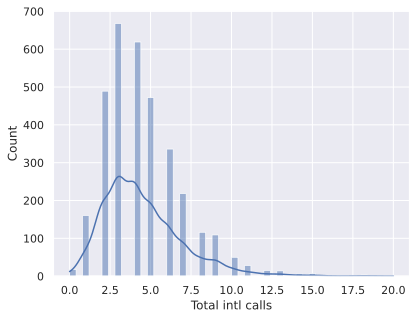

In [8]:
#sns.distplot(df["Total intl calls"]);
sns.histplot(df["Total intl calls"], kde=True)

Box plot
Another useful type of visualization is a box plot. seaborn does a great job here:

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


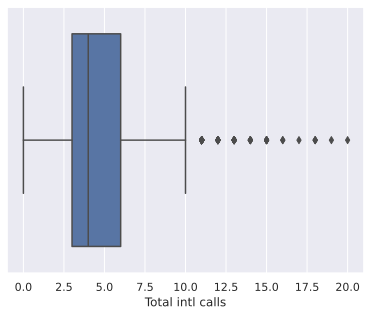

In [9]:
sns.boxplot(x="Total intl calls", data=df);

Let’s see how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 
 and 
 percentiles. The vertical line inside the box marks the median (
) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval 
, where 
 is the interquartile range.

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

Violin plot
The last type of distribution plots that we will consider is a violin plot.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a violin plot with the kernel density estimate on both sides.

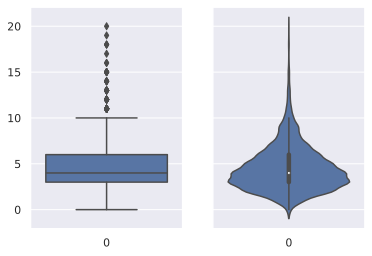

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

describe()
In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method describe() of a DataFrame:

In [11]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


2.2 Categorical and binary features
Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

Frequency table
Let’s check the class balance in our dataset by looking at the distribution of the target variable: the churn rate. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the value_counts() method:

In [12]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not balanced; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionally penalize our model errors in predicting the minority “Churn” class.

Bar plot
The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn’s function countplot(). There is another function in seaborn that is somewhat confusingly called barplot() and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let’s plot the distributions for two categorical variables:

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

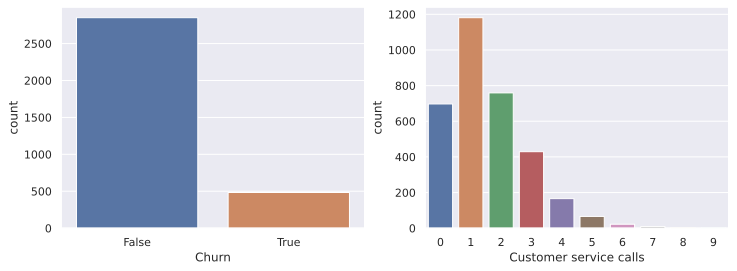

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);